# Semana 08 - Estatística

A Estatística se refere às técnicas com as quais entendemos e resumimos os dados. É uma área extensa mas que aqui, será abordada de forma superficial.

##Descrevendo um Conjunto de Dados

Com o crescimento forte da *Facedata*, nossa *CEO* têm interesse na descrição da quantidade de amigos que um usuário tem em geral. Usando as técnicas que vimos anteriormente, você pode facilmente produzir essas informações. Mas agora você se depara com o problema de como descrevê-las. Uma descrição óbvia de qualquer conjunto de dados é simplesmente os próprios dados:

In [ ]:
num_amigos = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1]

Para um conjunto de dados *pequeno*, essa pode até ser a melhor descrição. Mas para um conjunto de dados *grande*, isso é pesado e provavelmente nebuloso (imagine olhar para uma lista de 1 milhão de números!). Por esse motivo, usamos estatísticas descritivas para resumir e comunicar características relevantes de nossos bancos de dados.

Como primeira abordagem, você coloca a contagem de amigos em um histograma:

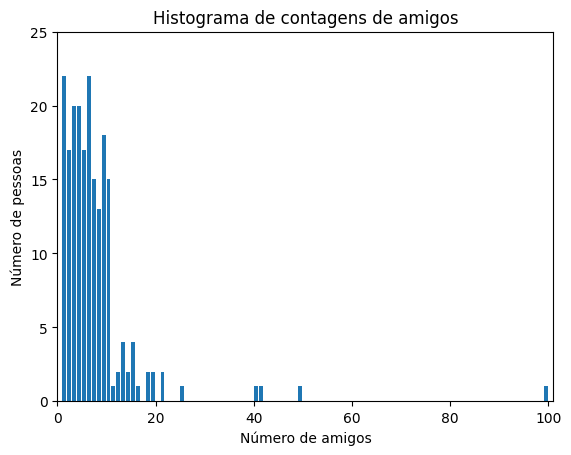

In [ ]:
import matplotlib.pyplot as plt

plt.hist(num_amigos, range(max(num_amigos) + 1), width = .8)
plt.axis([0, 101, 0, 25])
plt.title("Histograma de contagens de amigos")
plt.xlabel("Número de amigos")
plt.ylabel("Número de pessoas")
plt.show()

Infelizmente, este gráfico ainda é muito difícil de ser comentado. Assim, você começa a gerar algumas estatísticas. Provavelmente, a estatística mais simples é o total de observações:

In [ ]:
num_obs = len(num_amigos)
print(num_obs) # 204

204


Você provavelmente também está interessado nos maiores e menores valores:

In [ ]:
maior_valor = max(num_amigos)
print(maior_valor) # 100

menor_valor = min(num_amigos)
print(menor_valor) # 1

100
1


que são casos especiais do interesse em saber os valores em ordens específicas:

In [ ]:
valores_ordenados = sorted(num_amigos)

menor_valor = valores_ordenados[0]
print(menor_valor) # 1

segundo_menor_valor = valores_ordenados[1]
print(segundo_menor_valor) # 1

segundo_maior_valor = valores_ordenados[-2]
print(segundo_maior_valor) # 49

1
1
49


Mas estamos apenas começando...

> A partir de agora, teremos a tendência de utilizar a biblioteca *Pandas* para quase tudo! Ela foi criada para facilitar a manipulação de dados, tanto para gráficos quanto para estatística.

> Assim, vamos tender a transformar nossos objetos do tipo *lista* para `pd.Series` ou `pd.DataFrame` da seguinte forma:

In [ ]:
# Objeto 'num_amigos'
type(num_amigos) # list

list

In [ ]:
# Convertendo para pd.Series
import pandas as pd
num_amigos = pd.Series(num_amigos)
num_amigos

0      100
1       49
2       41
3       40
4       25
      ... 
199      1
200      1
201      1
202      1
203      1
Length: 204, dtype: int64

In [ ]:
# Objeto 'num_amigos' atualizado
type(num_amigos) # pandas.core.series.Series (isso significa que e um pd.Series)

pandas.core.series.Series

> **Relembrando:** `pd.DataFrame` é interpretado como uma planilha eletrônica. Cada coluna de `pd.DataFrame` é uma `pd.Series`. Então, se possuímos apenas uma *coluna* de uma planilha, criamos uma `pd.Series`. Se possuímos mais, criamos um `pd.DataFrame`.

### Tendências Centrais

Normalmente, queremos alguma noção de onde nossos dados estão centralizados. Mais comumente, usaremos a média (aritmética), que é apenas a soma dos dados divididos por sua contagem:

In [ ]:
print(num_amigos.mean())              # 7.33

# Esse calculo pode ser feito a mao:
print(sum(num_amigos) / len(num_amigos))  # 7.33

7.333333333333333


> Para a **média**, isso pode funcionar.

> Em outros casos, como a **mediana**, o cálculo é bem complicado e o `Pandas` já disponibiliza de forma simples.

Vamos calcular o número mediano de amigos:

> Mediana é o valor mais central (se o número de dados for ímpar) ou a média dos dois valores mais centrais (se o número de dados for par)

In [ ]:
print(num_amigos.median())    # 6

6.0


Por fim, a **moda** é o valor que aparece mais vezes no nosso conjunto de dados:

In [ ]:
print(num_amigos.mode())    # [1, 6]

# Por que temos 2 valores?

0    1
1    6
dtype: int64


Diferente das medidas anteriores, nem sempre a moda é única. Existem 2 modas neste conjunto de dados. As modas serão os valores que possuem as barras mais altas no histograma. Neste caso, temos um empate entre `1` e `6`.

In [ ]:
# Observe a seguinte tabela de frequencias (que coincide com o histograma feito anteriormente):
num_amigos.value_counts()

1      22
6      22
3      20
4      20
9      18
2      17
5      17
10     15
7      15
8      13
15      4
13      4
12      2
14      2
18      2
19      2
21      2
11      1
49      1
16      1
25      1
40      1
41      1
100     1
dtype: int64

### Dispersão

A dispersão refere-se a medida de quão espalhados são nossos dados. Normalmente, são estatísticas das quais quanto menos espalhado são os dados, mais próxima de zero estarão. Por exemplo, uma medida muito simples é a amplitude, que é apenas a diferença entre o maior e o menor elemento:

In [ ]:
# amplitude
num_amigos.max() - num_amigos.min()  # 99

99

A amplitude é precisamente zero quando os valores máximo e mínimo são iguais. Isso só pode acontecer se os elementos de `x` forem iguais. Quando isso ocorre, representa que os  dados estão o menos dispersos possível. Por outro lado, se a amplitude for grande, o valor máximo será *muito maior* que o valor mínimo. Consequentemente, os dados estarão mais espalhados.

Assim como a mediana, a amplitude não depende de todo o conjunto de dados. Um conjunto de dados cujos valores são todos 0 ou 100 tem a mesma amplitude de um conjunto de dados cujos valores são 0, 100 e muitos 50s. Intuitivamente, o primeiro conjunto de dados *deveria* ter maior dispersão.

Uma medida mais complexa de dispersão é a variância:

In [ ]:
# variancia
num_amigos.var() # 81.54

81.54351395730707

Agora, qualquer que seja a unidade em que nossos dados estejam (por exemplo, "amigos"), todas as nossas medidas de tendência central (média, mediana, moda) estão nessa mesma unidade. A amplitude será também nessa mesma unidade. Por outro lado, a variância tem unidades que são o quadrado das unidades originais (por exemplo, "amigos ao quadrado"). Como pode ser difícil entender isso, geralmente analisamos o desvio padrão:

In [ ]:
# desvio padrao
num_amigos.std()  # 9.03

9.030144736232474

## Correlação

Nossa excelentíssima *CEO* tem uma teoria de que a quantidade de tempo que as pessoas passam nas redes sociais está relacionada ao número de amigos que elas têm. A lista chamada `minutos_diarios` mostra quantos minutos por dia cada usuário gasta na *Facedata*, e você a ordenou de modo que seus elementos correspondam aos elementos da nossa lista anterior `num_amigos`. Gostaríamos de investigar a relação entre essas duas métricas.

Veremos primeiro a **covariância**, o análogo pareado da variância. Enquanto a variância mede como **uma única variável** se desvia de sua média, a **covariância** mede como **duas variáveis** variam em conjunto de suas médias:

In [ ]:
# Dados
num_amigos = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1]

minutos_diarios = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                   41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                   27.66,41.03,36.73,48.65,28.12,46.62,35.57,
                   32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                   36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,
                   33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,
                   22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,
                   35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,
                   36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,
                   25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                   32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,
                   16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,
                   16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,
                   35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,
                   21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,
                   13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,
                   25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,
                   35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,
                   37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
                   29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,
                   32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,
                   9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                   31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,
                   10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                   22.61,26.89,23.48,8.38,27.81,32.35,23.84]

horas_diarias = [x / 60 for x in minutos_diarios]

In [ ]:
# Transformando para pd.DataFrame (porque agora temos + de 1 coluna)
df_qtd_tempo = pd.DataFrame({
    "num_amigos": num_amigos,
    "minutos_diarios": minutos_diarios,
    "horas_diarias": horas_diarias
})

df_qtd_tempo

,num_amigos,minutos_diarios,horas_diarias
0,100,1.00,0.016667
1,49,68.77,1.146167
2,41,51.25,0.854167
3,40,52.08,0.868000
4,25,38.36,0.639333
...,...,...,...
199,1,23.48,0.391333
200,1,8.38,0.139667
201,1,27.81,0.463500
202,1,32.35,0.539167


In [ ]:
# covariancia
df_qtd_tempo.cov()

,num_amigos,minutos_diarios,horas_diarias
num_amigos,81.543514,22.425435,0.373757
minutos_diarios,22.425435,100.785899,1.679765
horas_diarias,0.373757,1.679765,0.027996


> Note que a **covariância** entre `num_amigos` e `num_amigos` é exatamente igual a variância calculada anteriormente.

*   Covariância positiva *grande* significa que `x` tende a crescer quando `y` aumenta e decrescer quando `y` diminui.
*   Covariância negativa *grande* significa o oposto – que `x` tende a decrescer quando `y` aumenta e vice-versa.
* Em contraponto, covariância próxima de zero significa que não existe tal relação.

No entanto, esse número pode ser difícil de interpretar, por alguns motivos:
*   Suas unidades são o produto das unidades dos elementos (por exemplo, amigo-minutos-por-dia), o que pode ser difícil de entender;
*   Se cada usuário tivesse o dobro de amigos (mas o mesmo número de minutos), a covariância seria duas vezes maior. Mas, em certo sentido, as variáveis seriam igualmente correlacionadas. Dito de outra forma, é difícil dizer o que é uma covariância *grande*.

Por esta razão, é mais simples olhar para a correlação - simplesmente é a covariância padronizada em um intervalo:

In [ ]:
# correlacao
df_qtd_tempo.corr()

,num_amigos,minutos_diarios,horas_diarias
num_amigos,1.00000,0.24737,0.24737
minutos_diarios,0.24737,1.00000,1.00000
horas_diarias,0.24737,1.00000,1.00000


> Note que a **correlação** entre `num_amigos` e `num_amigos` é exatamente igual a 1.

A correlação não tem unidade e sempre fica entre -1 (correlação positiva perfeita) e 1 (correlação negativa perfeita). Um número como 0,25 representa uma **correlação positiva relativamente fraca**.

No entanto, uma coisa que deixamos de fazer foi examinar nossos dados:

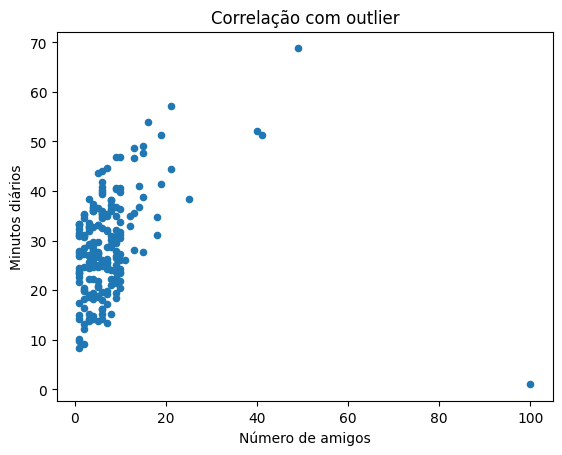

In [ ]:
df_qtd_tempo.plot.scatter(x='num_amigos', y='minutos_diarios')
plt.title("Correlação com outlier")
plt.xlabel("Número de amigos")
plt.ylabel("Minutos diários")
plt.show()

A pessoa com 100 amigos (que gasta apenas 1 minuto por dia no site) é um grande *outlier*, e a correlação pode ser muito sensível a *outliers*. O que acontece se o ignorarmos?

In [ ]:
# Mantendo somente as observacoes onde temos menos de 100 amigos
# Ou seja, excluindo a linha onde o numero de amigos e > 100 (sabemos que so temos 1)
df_qtd_tempo_sem_out = df_qtd_tempo[df_qtd_tempo['num_amigos'] < 100]

Sem o *outlier*, há uma correlação muito mais forte:


In [ ]:
# correlacao (sem outlier)
df_qtd_tempo_sem_out.corr()

,num_amigos,minutos_diarios,horas_diarias
num_amigos,1.000000,0.573679,0.573679
minutos_diarios,0.573679,1.000000,1.000000
horas_diarias,0.573679,1.000000,1.000000


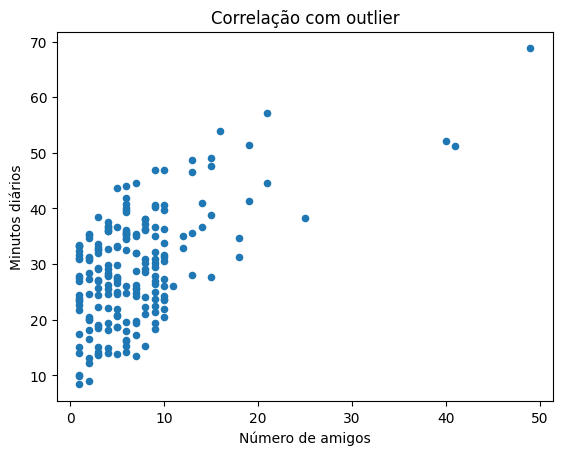

In [ ]:
df_qtd_tempo_sem_out.plot.scatter(x='num_amigos', y='minutos_diarios')
plt.title("Correlação com outlier")
plt.xlabel("Número de amigos")
plt.ylabel("Minutos diários")
plt.show()

> Você investiga e descobre que o valor discrepante era na verdade uma conta de teste interna que ninguém nunca se preocupou em remover. **Então, sua exclusão é justificada**.

## Exemplo prático

Vamos resgatar o exemplo de ações utilizado anteriormente:

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

# B3SA3.SA: B3 S.A. - Brasil, Bolsa, Balcão
# BBAS3.SA: Banco do Brasil S.A.
# ELET3.SA: Centrais Elétricas Brasileiras S.A. - Eletrobrás
# EMBR3.SA: Embraer S.A.
# PETR4.SA: Petróleo Brasileiro S.A. - Petrobras
acoes_br = yf.download("B3SA3.SA BBAS3.SA ELET3.SA EMBR3.SA PETR4.SA",
                       start = "2022-01-01",
                       end = "2022-12-31")

# separando somente os valores de fechamento
acoes_br = acoes_br.iloc[:, 5:10]

# renomeando
acoes_br.columns = ['B3SA3.SA',	'BBAS3.SA',	'ELET3.SA',	'EMBR3.SA',	'PETR4.SA']
acoes_br.index.name = 'data'

[*********************100%***********************]  5 of 5 completed


Vamos analisar (e relembrar) graficamente suas evolução ao longo do ano de 2022:

Text(0.5, 1.0, 'Valores de fechamento em 2022.')

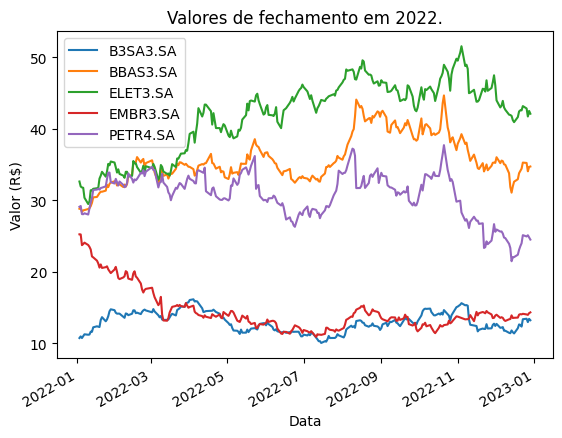

In [ ]:
ax = acoes_br.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Valor (R$)")
ax.set_title("Valores de fechamento em 2022.")

Vamos repetir as mesmas análises que fizemos anteriormente para ter conhecimento do relacionamento entre as ações dessas empresas:

In [ ]:
acoes_br.corr()

,B3SA3.SA,BBAS3.SA,ELET3.SA,EMBR3.SA,PETR4.SA
B3SA3.SA,1.000000,0.227068,-0.163558,0.182042,0.366749
BBAS3.SA,0.227068,1.000000,0.708316,-0.476260,0.384282
ELET3.SA,-0.163558,0.708316,1.000000,-0.757648,-0.090468
EMBR3.SA,0.182042,-0.476260,-0.757648,1.000000,0.123630
PETR4.SA,0.366749,0.384282,-0.090468,0.123630,1.000000


> Olhe para essa tabela (ou matriz) como o cálculo do coeficiente de correlação para cada possível par de variáveis (ou cada dimensão). Em destaque, temos o que chamamos de "diagonal principal". Nela, todos os valores são 1. Isso ocorre porque estamos calculando a correlação entre uma variável e ela mesmo. Outro detalhe interessante é que essa matriz é "simétrica". Ou seja, tudo que está acima da diagonal principal é idêntico ao que está abaixo. Isso ocorre porque, por exemplo, calcular a correlação entre a variável `X` e `Y` é equivalente a calcular a correlação entre `Y` e `X`.

Os números no ajudam muito na análise de um problema com muitas dimensões. Mas é sempre bem-vinda uma análise visual (quando possível). Podemos criar uma "matriz" de gráficos de dispersão da seguinte forma:

array([[<Axes: xlabel='B3SA3.SA', ylabel='B3SA3.SA'>,
        <Axes: xlabel='BBAS3.SA', ylabel='B3SA3.SA'>,
        <Axes: xlabel='ELET3.SA', ylabel='B3SA3.SA'>,
        <Axes: xlabel='EMBR3.SA', ylabel='B3SA3.SA'>,
        <Axes: xlabel='PETR4.SA', ylabel='B3SA3.SA'>],
       [<Axes: xlabel='B3SA3.SA', ylabel='BBAS3.SA'>,
        <Axes: xlabel='BBAS3.SA', ylabel='BBAS3.SA'>,
        <Axes: xlabel='ELET3.SA', ylabel='BBAS3.SA'>,
        <Axes: xlabel='EMBR3.SA', ylabel='BBAS3.SA'>,
        <Axes: xlabel='PETR4.SA', ylabel='BBAS3.SA'>],
       [<Axes: xlabel='B3SA3.SA', ylabel='ELET3.SA'>,
        <Axes: xlabel='BBAS3.SA', ylabel='ELET3.SA'>,
        <Axes: xlabel='ELET3.SA', ylabel='ELET3.SA'>,
        <Axes: xlabel='EMBR3.SA', ylabel='ELET3.SA'>,
        <Axes: xlabel='PETR4.SA', ylabel='ELET3.SA'>],
       [<Axes: xlabel='B3SA3.SA', ylabel='EMBR3.SA'>,
        <Axes: xlabel='BBAS3.SA', ylabel='EMBR3.SA'>,
        <Axes: xlabel='ELET3.SA', ylabel='EMBR3.SA'>,
        <Axes: xlabel='EM

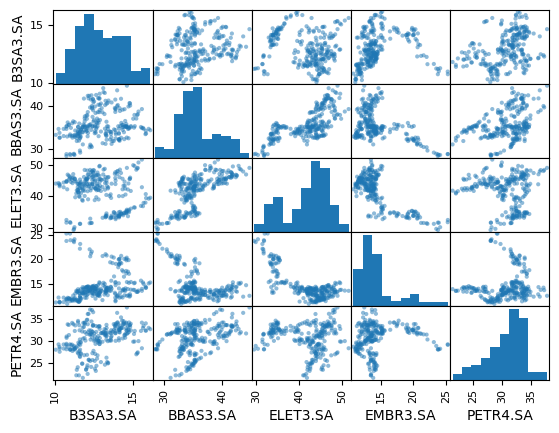

In [ ]:
pd.plotting.scatter_matrix(acoes_br)

Vemos que as ações `BBAS3.SA` e `ELET3.SA` seguem um padrão semelhante. Isto resulta em uma forte correlação positiva de 0.708. Por outro lado, note que as ações `BBAS3.SA` e `EMBR3.SA` demonstram uma correlação forte negativa de -0.758. Ou seja, com essas informações, sabendo que a ação `BBAS3.SA` está se valorizando, um sábio investidor tenderia a investir na ação `ELET3.SA`. Em contraste, ele fugiria de investimentos em `EMBR3.SA` nesse momento.

> Não necessariamente esse sábio investidor do exemplos ficaria rico através dessas análises. O mercado financeiro é muito mais complexo do que pensamos. No entanto, simples análises como essa ajudam (e muito) os analistas financeiros no mundo real.